In [1]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact

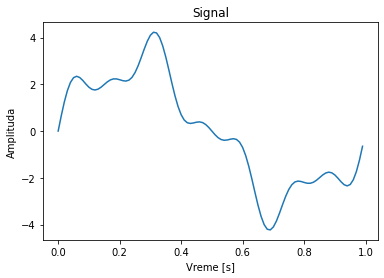

In [2]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.plot(t, x)
plt.title("Signal")
plt.xlabel("Vreme [s]")
plt.ylabel("Amplituda")
plt.show()

In [3]:
# Isto kao u proslom primeru
def DFT(x):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

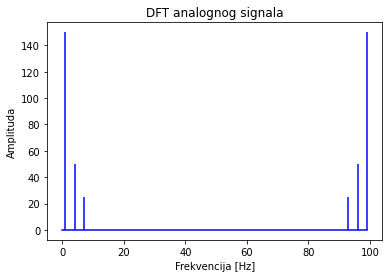

In [4]:
X = DFT(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.stem(freq, abs(X), linefmt="b", markerfmt=" ", basefmt="-b")
plt.title("DFT analognog signala")
plt.xlabel('Frekvencija [Hz]')
plt.ylabel('Amplituda')
plt.show()

In [5]:
def digitize(x, f, r):
    bins = np.array([x for x in range(2**r)])
    d = np.interp(x, (x.min(), x.max()), (0, 2**r - 1))
    
    mask = np.zeros(x.size, dtype=bool)
    mask[::int((x.size-1)/(f-1))] = 1
    
    return np.digitize(d[mask], bins) / (2**r)

In [7]:
@interact(f=(2, 100), r=(1, 8))
def dft_compare(f=20, r=4):
    x_dig = digitize(x, f, r)
    X = DFT(x_dig)

    # calculate the frequency
    N = len(X)
    n = np.arange(N)
    T = N/sr
    freq = n/T
    
    n_oneside = N//2
    # get the one side frequency
    f_oneside = freq[:n_oneside]

    # normalize the amplitude
    X_oneside =X[:n_oneside]/n_oneside
    
    plt.figure(figsize = (12, 6))
    plt.subplot(121)
    plt.plot(n, x_dig)
    plt.title("Digitalni signal")

    plt.subplot(122)
    plt.stem(f_oneside, abs(X_oneside), linefmt='b', markerfmt=" ", basefmt="-b")
    plt.title("DFT digitalnog signala")
    plt.xlabel('Frekvencija [Hz]')
    plt.ylabel('Normalizovana amplituda')
    plt.tight_layout()
    plt.show()

interactive(children=(IntSlider(value=20, description='f', min=2), IntSlider(value=4, description='r', max=8, …